In [18]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utilsimport to_categorical
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Label:  0
Label type:  <class 'numpy.uint8'>


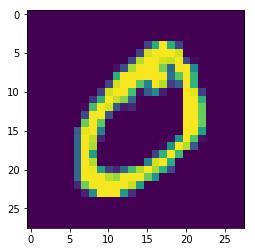

In [17]:
# Display example

sample = 1

print("Label: ", y_train[sample])
print("Label type: ", type(y_train[sample]))
plt.imshow(X_train[sample])
plt.show()

In [36]:
def preprocess_features(features):
    return features

def preprocess_labels(labels):
    return to_categorical(labels, num_classes=10)

In [43]:
processed_training_features = preprocess_features(X_train)
print("Training Feature shape:", processed_training_features.shape)

processed_training_labels = preprocess_labels(y_train)
print("Training Label shape:", processed_training_labels.shape)

processed_testing_features = preprocess_features(X_test)
print("Testing Feature shape:", processed_testing_features.shape)

processed_testing_labels = preprocess_labels(y_test)
print("Testing Label shape:", processed_testing_labels.shape)

Training Feature shape: (60000, 28, 28)
Training Label shape: (60000, 10)
Testing Feature shape: (10000, 28, 28)
Testing Label shape: (10000, 10)


In [48]:
def mlp():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28,28)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    return model
    
def cnn():
    pass

In [49]:
# Setup
features = processed_training_features
targets  = processed_training_labels
model    = mlp()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 28, 512)           14848     
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 512)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               7340544   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 7,360,522.0
Trainable params: 7,360,522.0
Non-trainable params: 0.0
____________________________________________________________

In [50]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(features, targets,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(processed_testing_features, processed_testing_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 141s - loss: 9.0329 - acc: 0.4373 - val_loss: 8.1073 - val_acc: 0.4959
Epoch 2/5
60000/60000 [==============================] - 141s - loss: 8.2232 - acc: 0.4888 - val_loss: 8.0620 - val_acc: 0.4992
Epoch 3/5
60000/60000 [==============================] - 143s - loss: 8.1752 - acc: 0.4918 - val_loss: 8.0247 - val_acc: 0.5017
Epoch 4/5
60000/60000 [==============================] - 150s - loss: 7.2829 - acc: 0.5464 - val_loss: 6.7284 - val_acc: 0.5814
Epoch 5/5
60000/60000 [==============================] - 152s - loss: 6.8432 - acc: 0.5740 - val_loss: 6.6900 - val_acc: 0.5842


In [52]:
score = model.evaluate(processed_testing_features, processed_testing_labels, verbose=0)
print('Multilayer Perceptron')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Multilayer Perceptron
Test loss: 6.69000943527
Test accuracy: 0.5842
